<a href="https://colab.research.google.com/github/g00u00/colab/blob/main/matplot_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Работаем с диском и строим графики 

## Подготовка рабочего пространства

In [4]:
#https://gspread.readthedocs.io/en/latest/api.html?highlight=DataFrame.from_records#models
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
from oauth2client.client import GoogleCredentials
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/matplot_bar/
gs = gspread.authorize(GoogleCredentials.get_application_default())
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
['.config', 'drive', 'adc.json', 'sample_data']
['.file-revisions-by-id', '.shortcut-targets-by-id', 'MyDrive', '.Trash']
total 43
-rw------- 1 root 15827 Feb 25 22:12 barchart.ipynb
-rw------- 1 root 22817 Feb 27 22:10 matplot_bar.ipynb
-rw------- 1 root  4001 Feb 27 22:10 matplot_bar_swot.png
-rw------- 1 root   112 Feb 26 16:50 swot_dictionary11.json
Sat Feb 27 22:11:04 MSK 2021


## Считывание данных и построение графиков

![mvv.png](https://drive.google.com/uc?id=1ZZX1NvDR4Iy6FBUyUWd7qHIP1vjZ4X-v)



<!!--matplot_data
Sat Feb 27 22:12:47 MSK 2021

<br>1 {"weaknesses": 3.8499999999999996, "opportunities": 140.0, "strengths": 111.0, "threats": 2000.189999999999998}

<br> {'weaknesses': 3.8499999999999996, 'opportunities': 140.0, 'strengths': 111.0, 'threats': 2000.19}
<br>
[1, 2, 3, 4, 5] ['strengths', 'weaknesses', 'opportunities', 'threats', 'result'] [111.0, -3.8499999999999996, 140.0, -2000.19, -1753.04]
списки формированы-->

<!--разбивка по абсцисс и значения ординат
 5 [0, 1, 2, 3, 4] [111.0, -3.8499999999999996, 140.0, -2000.19, -1753.04]  -->



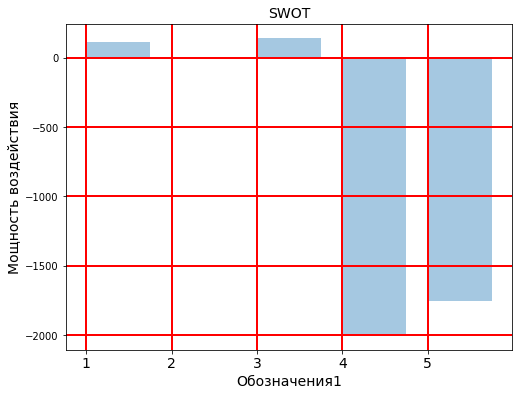

<div class="d-flex flex-row ">
<div class="card m-1" style="width: 28rem;"> <img  src="/content/drive/MyDrive/Colab Notebooks/matplot_bar//matplot_bar_swot.png" class="card-img-top" alt="..."> <div class="card-body">
1  -  strengths ; 
2  -  weaknesses ; 
3  -  opportunities ; 
4  -  threats ; 
5  -  result ; 
</div> </div>
<div>
Sat Feb 27 22:12:47 MSK 2021
Sat Feb 27 22:12:48 MSK 2021


In [8]:
#!/usr/bin/env python3.4
'''\
https://ru.wikipedia.org/wiki/Matplotlib
https://github.com/rougier/matplotlib-tutorial
http://people.duke.edu/~ccc14/pcfb/numpympl/MatplotlibBarPlots.html
https://eax.me/python-matplotlib/
https://matplotlib.org/
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
https://matplotlib.org/users/index_text.html
https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
'''
#import matplotlib
#matplotlib.use('Agg')
#import matplotlib.pyplot as plt
import json

def matplot(element):
    import matplotlib.pyplot as plt
    x=list()
    x_float=list()
    title=list()
    y_float=list()
    
    print('\n<!!--matplot_data')
    
    read_file = open ("/content/drive/MyDrive/Colab Notebooks/matplot_bar/swot_dictionary11.json", mode='r', encoding="utf-8")
    i=0
    !date
    for line in read_file.readlines():
        print('\n<br>1', line, end="")
        i+=1
        data = json.loads(line)
        print('\n<br>', data, end="")
        print('\n<br>')
        title = [ "strengths", "weaknesses", "opportunities", "threats", "result"]
        x=title
        x_float = [1, 2, 3, 4, 5]
        #title.append(data['name'])
        result = float(data['strengths']) - 1*float(data['weaknesses']) + float(data['opportunities']) - 1*float(data['threats'])
        y = [float(data['strengths']), float(data['weaknesses']), float(data['opportunities']), float(data['threats'])]
        y_float = [float(data['strengths']), -1*float(data['weaknesses']), float(data['opportunities']), -1*float(data['threats']),  result]
        print(x_float,title,y_float)
    print('списки формированы-->\n')
    read_file.close()
    x_pos=list()
    for i in range(x_float.__len__()):
        x_pos.append(i)
    print('<!--разбивка по абсцисс и значения ординат\n', len( x_float), x_pos, y_float, ' -->\n')

    fig=plt.figure(figsize=(8,6), dpi=72)
    plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
    plt.xticks(x_pos,  x_float, fontsize=14)
    plt.xlabel('Обозначения1', fontsize=14)
    plt.ylabel('Мощность воздействия', fontsize=14)
    plt.title('SWOT', fontsize=14)
    plt.grid(True, color='r', linestyle='-', linewidth=2)
    #plt.draw()
    plt.show()
    fig.savefig("/content/drive/MyDrive/Colab Notebooks/matplot_bar/matplot_bar_swot.png")
    print('<div class="d-flex flex-row ">')
    print('<div class="card m-1" style="width: 28rem;">',
          '<img  src="/content/drive/MyDrive/Colab Notebooks/matplot_bar//matplot_bar_swot.png" class="card-img-top" alt="...">',
          '<div class="card-body">')
    
    for i in range(title.__len__()):
        print(i+1, " - ", title[i], "; ")
        i += 1
    print('</div>', '</div>')
    print('<div>')
    !date
    

def  to_browser():
    print("Content-type:text/html\r\n")
    print('\n',
    '\n<html>\n<head>\n<title>SWOT</title>\n<meta charset="UTF-8">',
    '\n<meta name="viewport" content="width=device-width, initial-scale=1.0">',
    '\n<meta http-equiv="X-UA-Compatible" content="ie=edge">',
    '\n<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0-beta/css/bootstrap.min.css" integrity="sha384-/Y6pD6FV/Vv2HJnA6t+vslU6fwYXjCFtcEpHbNJ0lyAFsXTsjBbfaDjzALeQsN6M" crossorigin="anonymous">',
    '\n</head>',
    '\n<body>',
    '\n<div class="container-md mx-3">'
    )

if __name__ == "__main__":
    #to_browser()
    element = 'swot_dictionary'
    matplot(element)
    #print("</div></body></html>",)
    !date


![mvv.png](https://drive.google.com/uc?id=1ZZX1NvDR4Iy6FBUyUWd7qHIP1vjZ4X-v)

In [6]:
data = {"opportunities": 14.0, "threats": 20.189999999999998, "strengths": 17.5, "weaknesses": 3.8}
print(data)
print (data.keys())
dir(data)
title=list()
x_float = list()
y = list()
i=1
for key in data.keys():
  print(key, data[key])
  x_float.append(i)
  title.append(key)
  y.append(data[key])
  i+=1
print(x_float)
print(title)
print(y)




{'opportunities': 14.0, 'threats': 20.189999999999998, 'strengths': 17.5, 'weaknesses': 3.8}
dict_keys(['opportunities', 'threats', 'strengths', 'weaknesses'])
opportunities 14.0
threats 20.189999999999998
strengths 17.5
weaknesses 3.8
[1, 2, 3, 4]
['opportunities', 'threats', 'strengths', 'weaknesses']
[14.0, 20.189999999999998, 17.5, 3.8]
